<a href="https://colab.research.google.com/github/Vardhan0000/ML_LABS/blob/main/ml_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **5. Develop a program for Bias, Variance, Remove duplicates , Cross Validation**

**Bias:** It is simply defined as the inability of the model because of that there is some difference or error occurring between the model’s predicted value and the actual value. These differences between actual or expected values and the predicted values are known as error or bias error or error due to bias. Bias is a systematic error that occurs due to wrong assumptions in the machine learning process.



Let
Y
Y be the true value of a parameter, and let
Y
^
Y
^
  be an estimator of
Y
Y based on a sample of data. Then, the bias of the estimator
Y
^
Y
^
  is given by:

Bias
(
Y
^
)
=
E
(
Y
^
)
–
Y
Bias(
Y
^
 )=E(
Y
^
 )–Y

where
E
(
Y
^
)
  
E(
Y
^
 )   is the expected value of the estimator
Y
^
Y
^
 . It is the measurement of the model that how well it fits the data.

**Low Bias:** Low bias value means fewer assumptions are taken to build the target function. In this case, the model will closely match the training dataset.

**High Bias:** High bias value means more assumptions are taken to build the target function. In this case, the model will not match the training dataset closely.

**Variance:**  It is the measure of spread in data from its mean position. In machine learning variance is the amount by which the performance of a predictive model changes when it is trained on different subsets of the training data. More specifically, variance is the variability of the model that how much it is sensitive to another subset of the training dataset. i.e. how much it can adjust on the new subset of the training dataset.

Let Y be the actual values of the target variable, and  Y
^
     be the predicted values of the target variable. Then the variance of a model can be measured as the expected value of the square of the difference between predicted values and the expected value of the predicted values.

Variance
=
E
[
(
Y
^
–
E
[
Y
^
]
)
2
]
Variance=E[(
Y
^
 –E[
Y
^
 ])
2
 ]

where
E
[
Y
ˉ
]
E[
Y
ˉ
 ] is the expected value of the predicted values. Here expected value is averaged over all the training data.

Variance errors are either low or high-variance errors.

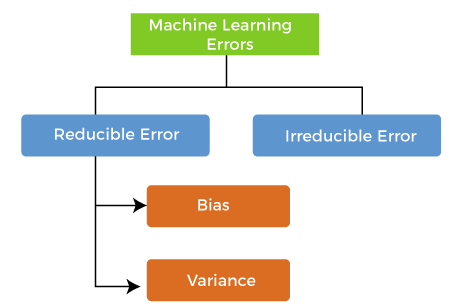

**Removing duplicates :** It is crucial for ensuring that your machine learning model learns from clean and accurate data, leading to better performance and more reliable outcomes.

**Cross Validation :** Cross-validation is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data. We can also say that it is a technique to check how a statistical model generalizes to an independent dataset.

It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Create a simple synthetic dataset
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 samples, single feature
y = 2 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with noise

# Convert to DataFrame
data = pd.DataFrame(np.column_stack((X, y)), columns=['Feature', 'Target'])

# Step 2: Remove duplicates
data = data.drop_duplicates()

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data[['Feature']], data['Target'], test_size=0.2, random_state=42)

# Step 4: Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate bias and variance
def calculate_bias_variance(y_true, y_pred):
    bias = np.mean((y_true - np.mean(y_pred)) ** 2)
    variance = np.mean((y_pred - np.mean(y_pred)) ** 2)
    return bias, variance

bias_train, variance_train = calculate_bias_variance(y_train, y_train_pred)
bias_test, variance_test = calculate_bias_variance(y_test, y_test_pred)

# Step 5: Cross-validation
cross_val_scores = cross_val_score(model, data[['Feature']], data['Target'], cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cross_val_scores)

# Plotting
plt.figure(figsize=(16, 6))

# Scatter plot of the dataset
plt.subplot(1, 3, 1)
plt.scatter(data['Feature'], data['Target'], color='royalblue', alpha=0.7, edgecolor='k', s=80, label='Data points')
plt.scatter(X_test, y_test_pred, color='coral', marker='o', s=100, label='Test Predictions')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, linestyle='--', label='Predicted Line')
plt.title('Linear Regression Fit', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.grid(True)
plt.legend()

# Bar plot for bias and variance
plt.subplot(1, 3, 2)
labels = ['Train Bias', 'Train Variance', 'Test Bias', 'Test Variance']
values = [bias_train, variance_train, bias_test, variance_test]
colors = ['salmon', 'lightgreen', 'salmon', 'lightgreen']

bars = plt.bar(labels, values, color=colors, edgecolor='black')
plt.title('Bias and Variance', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.ylim(0, max(values) + 1)  # Adjust y-axis limits

# Add data labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.grid(axis='y')

# Cross-validation scores plot
plt.subplot(1, 3, 3)
plt.bar(range(1, len(cross_val_scores) + 1), -cross_val_scores, color='teal', edgecolor='black')
plt.title('Cross-Validation Scores', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xticks(range(1, len(cross_val_scores) + 1))  # Set x-ticks to match the number of folds
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Print results
print(f'Train Bias: {bias_train:.3f}, Train Variance: {variance_train:.3f}')
print(f'Test Bias: {bias_test:.3f}, Test Variance: {variance_test:.3f}')
print(f'Mean Cross-Validation MSE: {mean_cv_score:.3f}')
